# Catch Joe - Karol Laszewski

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DatetimeIndex as dt
sns.set_style("whitegrid")

### Read dataset

In [2]:
df = pd.read_json('train.json')
df

browser          os locale  user_id gender  \
0                Firefox      Ubuntu  ru_RU      105      m   
1                Firefox   Windows 8  pl-PL       11      m   
2                 Chrome      Ubuntu  zh-CN       17      m   
3                Firefox  Windows 10  en-SG       92      f   
4      Internet Explorer   Windows 8  xh-ZA      120      m   
...                  ...         ...    ...      ...    ...   
59995             Chrome   Windows 8  en-SG       60      f   
59996             Chrome  Windows 10  pt-PT      178      m   
59997             Safari       MacOS  it-IT       32      m   
59998            Firefox  Windows 10  ru_RU       56      m   
59999            Firefox  Windows 10  pt-BR      113      f   

                    location  \
0                USA/Chicago   
1                USA/Chicago   
2        Singapore/Singapore   
3                USA/Chicago   
4               France/Paris   
...                      ...   
59995            USA/Chicago   
59996   New Zealand/Auckland   
59997  Netherlands/Amsterdam   
59998           France/Paris   
59999   New Zealand/Auckland   

                                                   sites      time       date  
0      [{'site': 'mail.google.com', 'length': 50}, {'...  09:03:00 2017-01-08  
1      [{'site': 'meduza.org', 'length': 40}, {'site'...  13:57:00 2016-10-05  
2      [{'site': 'facebook.net', 'length': 74}, {'sit...  02:06:00 2017-03-28  
3      [{'site': 'live.com', 'length': 79}, {'site': ...  00:05:00 2016-02-10  
4      [{'site': 'cnn.com', 'length': 65}, {'site': '...  14:55:00 2017-03-28  
...                                                  ...       ...        ...  
59995  [{'site': 'toptal.com', 'length': 191}, {'site...  14:59:00 2016-02-01  
59996  [{'site': 'vk.com', 'length': 126}, {'site': '...  06:02:00 2016-12-30  
59997  [{'site': 'slack.com', 'length': 74}, {'site':...  10:27:00 2017-01-27  
59998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...  14:17:00 2016-12-06  
59999  [{'site': 'baidu.com', 'length': 60}, {'site':...  06:57:00 2016-02-18  

[60000 rows x 9 columns]

## Exploratory analysis

No missing values

In [3]:
df.isnull().sum()

browser     0
os          0
locale      0
user_id     0
gender      0
location    0
sites       0
time        0
date        0
dtype: int64

Info about datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   browser   60000 non-null  object        
 1   os        60000 non-null  object        
 2   locale    60000 non-null  object        
 3   user_id   60000 non-null  int64         
 4   gender    60000 non-null  object        
 5   location  60000 non-null  object        
 6   sites     60000 non-null  object        
 7   time      60000 non-null  object        
 8   date      60000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 4.1+ MB


### Creating dataframe only with user_id = 0

In [5]:
df_joe = df[df.user_id == 0]
df_joe

browser          os locale  user_id gender        location  \
146     Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
147    Firefox  Windows 10  ru_RU        0      m  Canada/Toronto   
272    Firefox  Windows 10  ru_RU        0      m     USA/Chicago   
531    Firefox      Ubuntu  ru_RU        0      m    France/Paris   
605    Firefox  Windows 10  ru_RU        0      m    France/Paris   
...        ...         ...    ...      ...    ...             ...   
59541  Firefox      Ubuntu  ru_RU        0      m    France/Paris   
59653  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago   
59835   Chrome      Ubuntu  ru_RU        0      m  Canada/Toronto   
59946  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago   
59985   Chrome  Windows 10  ru_RU        0      m     USA/Chicago   

                                                   sites      time       date  
146    [{'site': 'youtube.com', 'length': 71}, {'site...  18:26:00 2016-11-22  
147    [{'site': 'mail.google.com', 'length': 140}, {...  16:57:00 2017-08-05  
272    [{'site': 'mail.google.com', 'length': 207}, {...  03:42:00 2017-02-19  
531    [{'site': 'vk.com', 'length': 56}, {'site': 's...  19:15:00 2016-04-08  
605    [{'site': 'mail.google.com', 'length': 161}, {...  10:04:00 2016-06-19  
...                                                  ...       ...        ...  
59541  [{'site': 'vk.com', 'length': 86}, {'site': 'm...  11:09:00 2016-01-27  
59653  [{'site': 'mail.google.com', 'length': 59}, {'...  03:04:00 2017-01-17  
59835  [{'site': 'mail.google.com', 'length': 124}, {...  01:53:00 2017-08-16  
59946  [{'site': 'mail.google.com', 'length': 80}, {'...  17:46:00 2016-12-12  
59985  [{'site': 'vk.com', 'length': 109}, {'site': '...  02:35:00 2017-05-02  

[294 rows x 9 columns]

In dataset can see 294 observations about Joe

#### Feature analysis

In [6]:
print(df['browser'].value_counts())
print(df_joe['browser'].value_counts())


Chrome               24531
Firefox              17843
Safari               11659
Internet Explorer     5967
Name: browser, dtype: int64
Firefox    154
Chrome     140
Name: browser, dtype: int64


Joe use only Firefox and Chrome

In [7]:
print(df['os'].value_counts())
print(df_joe['os'].value_counts())

Windows 10    24960
MacOS         11659
Windows 8      9570
Ubuntu         5365
Windows 7      5215
Debian         3231
Name: os, dtype: int64
Ubuntu        155
Windows 10    139
Name: os, dtype: int64


Joe uses only Ubuntu and Windows 10

In [8]:
print(df['locale'].value_counts())
print(df_joe['locale'].value_counts())

uk-UA    4135
ur-PK    3845
pt-BR    3638
en-SG    3267
en-AU    2749
ru_RU    2702
en-GB    2628
ro-RO    2628
es-MX    2572
fr-FR    2559
it-IT    2435
xh-ZA    2267
pt-PT    2259
vi-VN    2236
en-CA    2210
en-US    2125
ru-RU    2078
zh-CN    1933
pl-PL    1932
en-NZ    1807
wo-SN    1803
nl-NL    1648
de-DE    1527
bg-BG    1511
ja-JP    1506
Name: locale, dtype: int64
ru_RU    294
Name: locale, dtype: int64


Locale of Joe is only ru_RU

In [9]:
print(df['gender'].value_counts())
print(df_joe['gender'].value_counts())

m    35320
f    24680
Name: gender, dtype: int64
m    294
Name: gender, dtype: int64


Joe gender is male

In [10]:
print(df['location'].value_counts())
print(df_joe['location'].value_counts())

New Zealand/Auckland     4549
France/Paris             4459
Germany/Berlin           3800
Singapore/Singapore      3749
Australia/Sydney         3214
Canada/Vancouver         3179
Canada/Toronto           3127
Japan/Tokyo              3124
USA/Chicago              2969
UK/London                2910
USA/San Francisco        2692
Malaysia/Kuala Lumpur    2607
Italy/Rome               2532
Spain/Madrid             2452
Russia/Moscow            2405
USA/Miami                2396
India/Delhi              2262
China/Shanghai           2091
Netherlands/Amsterdam    2033
USA/New York             1762
Brazil/Rio de Janeiro    1688
Name: location, dtype: int64
USA/Chicago       120
France/Paris      117
Canada/Toronto     57
Name: location, dtype: int64


Joe locations are: Usa/Chicago, France/Paris and Canada/Toronto

### Feature engineering

Change date, to day of the week (0 is Monday, 6 is Sunday)

In [11]:
df['week_day'] = df['date'].dt.dayofweek
df = df.drop('date', axis = 1)

<AxesSubplot:ylabel='week_day'>

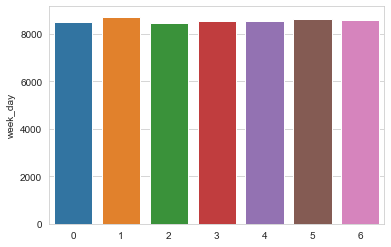

In [12]:
day = df['week_day'].value_counts()
sns.barplot(x = day.index, y = day)

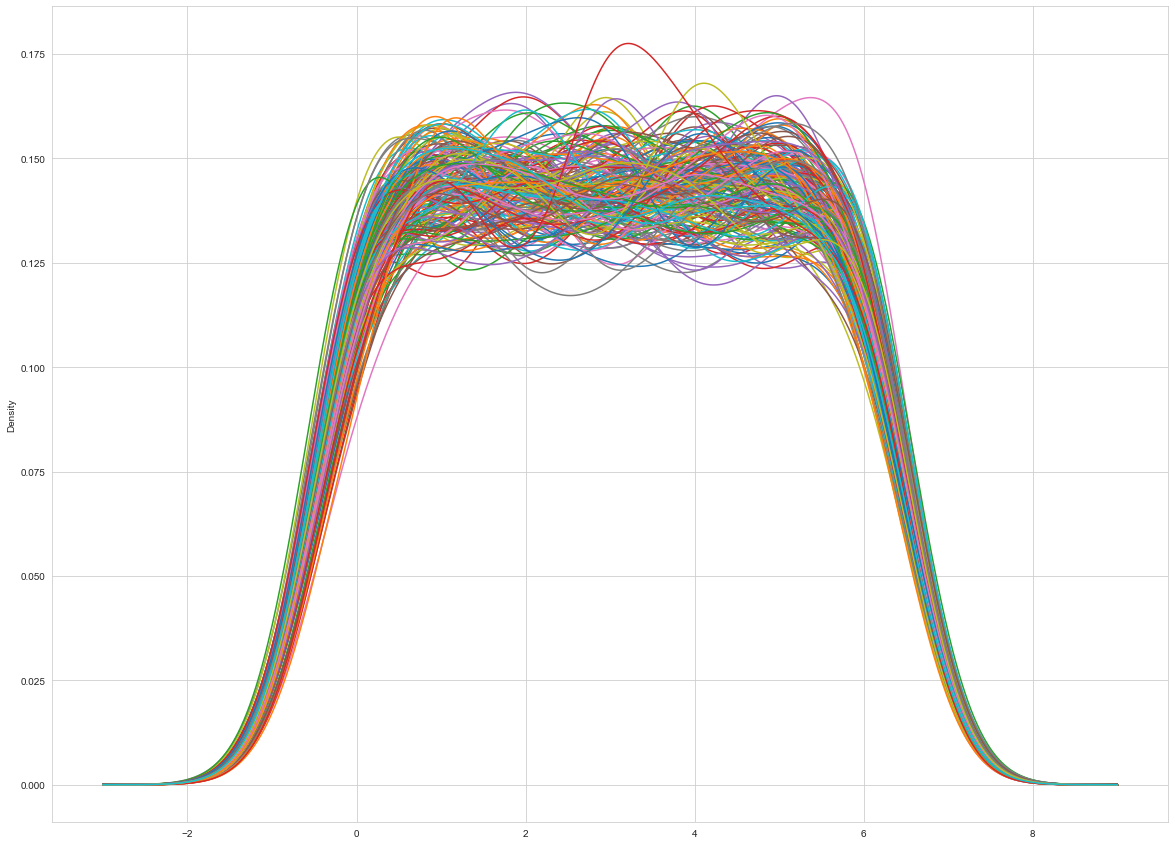

In [13]:
df.groupby('user_id')['week_day'].plot.density(figsize = (20,15))
plt.show()

Time

In [14]:
df['hour'] = df['time'].apply(lambda x: pd.to_datetime(x).hour + pd.to_datetime(x).minute/60)
df = df.drop('time', axis = 1)

Distribution of hours for all dataset grouped by user_id

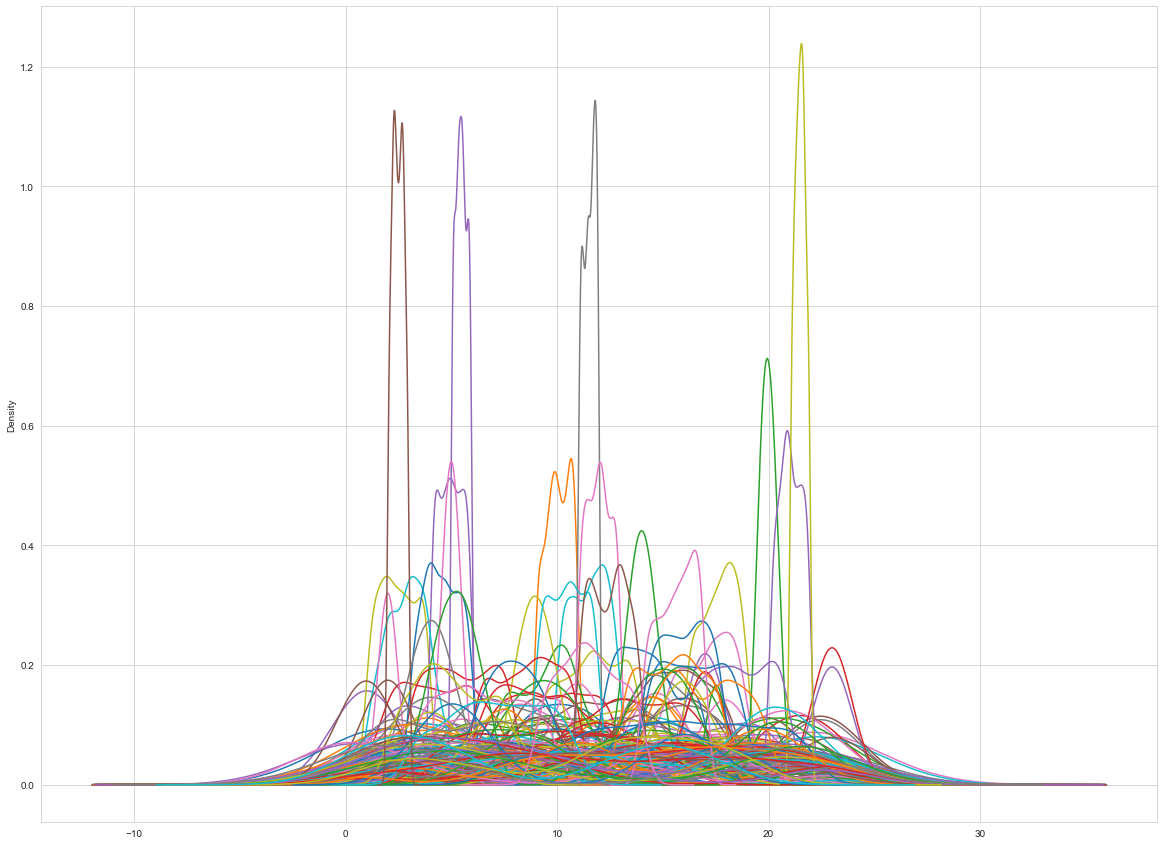

In [15]:
df.groupby('user_id')['hour'].plot.density(figsize = (20,15))
plt.show()

In [16]:
df

browser          os locale  user_id gender  \
0                Firefox      Ubuntu  ru_RU      105      m   
1                Firefox   Windows 8  pl-PL       11      m   
2                 Chrome      Ubuntu  zh-CN       17      m   
3                Firefox  Windows 10  en-SG       92      f   
4      Internet Explorer   Windows 8  xh-ZA      120      m   
...                  ...         ...    ...      ...    ...   
59995             Chrome   Windows 8  en-SG       60      f   
59996             Chrome  Windows 10  pt-PT      178      m   
59997             Safari       MacOS  it-IT       32      m   
59998            Firefox  Windows 10  ru_RU       56      m   
59999            Firefox  Windows 10  pt-BR      113      f   

                    location  \
0                USA/Chicago   
1                USA/Chicago   
2        Singapore/Singapore   
3                USA/Chicago   
4               France/Paris   
...                      ...   
59995            USA/Chicago   
59996   New Zealand/Auckland   
59997  Netherlands/Amsterdam   
59998           France/Paris   
59999   New Zealand/Auckland   

                                                   sites  week_day       hour  
0      [{'site': 'mail.google.com', 'length': 50}, {'...         6   9.050000  
1      [{'site': 'meduza.org', 'length': 40}, {'site'...         2  13.950000  
2      [{'site': 'facebook.net', 'length': 74}, {'sit...         1   2.100000  
3      [{'site': 'live.com', 'length': 79}, {'site': ...         2   0.083333  
4      [{'site': 'cnn.com', 'length': 65}, {'site': '...         1  14.916667  
...                                                  ...       ...        ...  
59995  [{'site': 'toptal.com', 'length': 191}, {'site...         0  14.983333  
59996  [{'site': 'vk.com', 'length': 126}, {'site': '...         4   6.033333  
59997  [{'site': 'slack.com', 'length': 74}, {'site':...         4  10.450000  
59998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...         1  14.283333  
59999  [{'site': 'baidu.com', 'length': 60}, {'site':...         3   6.950000  

[60000 rows x 9 columns]

## Candidates for being Joe:
- browser = ('Firefox','Chrome')
- os = ('Ubuntu','Windows 10')
- locale = ('ru_RU')
- gender = ('m')
- location = (Usa/Chicago, France/Paris, Canada/Toronto)

In [17]:
df_candidates = df[df["browser"].isin(["Chrome", "Firefox"]) &
        df["os"].isin(["Windows 10", "Ubuntu"]) &
        (df["locale"] == "ru_RU") &
        (df["gender"] == "m") &
        df["location"].isin(["France/Paris", "USA/Chicago", "Canada/Toronto"])]

df_candidates['user_id'].value_counts()

192    312
56     306
105    302
181    300
15     299
111    297
0      294
82     293
69     122
Name: user_id, dtype: int64

In [18]:
df_candidates['Joe'] = df_candidates['user_id'].apply(lambda x: 0 if x == 0 else 1)
df_candidates

/var/folders/kj/z66l9p5n1gj57z83zdxbnnsm0000gn/T/ipykernel_25005/1170202130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_candidates['Joe'] = df_candidates['user_id'].apply(lambda x: 0 if x == 0 else 1)


browser          os locale  user_id gender        location  \
0      Firefox      Ubuntu  ru_RU      105      m     USA/Chicago   
69      Chrome      Ubuntu  ru_RU       15      m    France/Paris   
125     Chrome      Ubuntu  ru_RU       82      m     USA/Chicago   
146     Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
147    Firefox  Windows 10  ru_RU        0      m  Canada/Toronto   
...        ...         ...    ...      ...    ...             ...   
59934  Firefox  Windows 10  ru_RU       15      m    France/Paris   
59946  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago   
59981   Chrome  Windows 10  ru_RU      192      m    France/Paris   
59985   Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
59998  Firefox  Windows 10  ru_RU       56      m    France/Paris   

                                                   sites  week_day       hour  \
0      [{'site': 'mail.google.com', 'length': 50}, {'...         6   9.050000   
69     [{'site': 'lenta.ru', 'length': 279}, {'site':...         4  19.233333   
125    [{'site': 'mail.google.com', 'length': 59}, {'...         4  21.366667   
146    [{'site': 'youtube.com', 'length': 71}, {'site...         1  18.433333   
147    [{'site': 'mail.google.com', 'length': 140}, {...         5  16.950000   
...                                                  ...       ...        ...   
59934  [{'site': 'lenta.ru', 'length': 75}, {'site': ...         6  20.650000   
59946  [{'site': 'mail.google.com', 'length': 80}, {'...         0  17.766667   
59981  [{'site': 'vk.com', 'length': 51}, {'site': 'y...         5   0.466667   
59985  [{'site': 'vk.com', 'length': 109}, {'site': '...         1   2.583333   
59998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...         1  14.283333   

       Joe  
0        1  
69       1  
125      1  
146      0  
147      0  
...    ...  
59934    1  
59946    0  
59981    1  
59985    0  
59998    1  

[2525 rows x 10 columns]

In [19]:
df_candidates['Joe'].value_counts()

1    2231
0     294
Name: Joe, dtype: int64

### Activity on sites

In [21]:
temp_sites = {}
Joe_id = 0
for s in df_candidates[df_candidates["user_id"] == Joe_id]["sites"]:
    for site in s:
        if site["site"] not in temp_sites:
            temp_sites[site["site"]] = 0
        temp_sites[site["site"]] += 1
print('User Id =',Joe_id)
print(len(temp_sites)) 
print(sum(temp_sites.values()))
top_sites = {key:temp_sites[key] for key in temp_sites if temp_sites[key]>2}
print(top_sites)
print(sorted(top_sites.keys()))

User Id = 0
874
2454
{'youtube.com': 256, 'vk.com': 259, 'mail.google.com': 253, 'toptal.com': 263, 'slack.com': 261, 'lenta.ru': 261}
['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']


### Joe's most popular 6 sites: 'lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com'

How much time user spend on those 6 most popular for Joe sites

In [22]:
site_names = ['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']

def get_sites(s):
    list =[0] * len(site_names)
    for site in s:
        if site['site'] in site_names:
            idx = site_names.index(site['site'])
            list[idx] += site['length']
    return pd.Series(list, index=site_names)

df_candidates[site_names] = df_candidates['sites'].apply(lambda x: get_sites(x))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


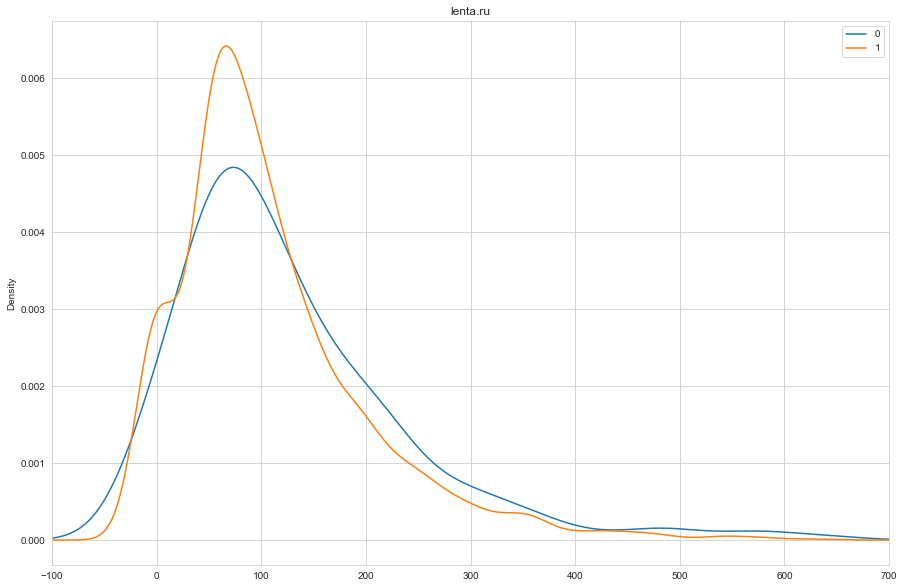

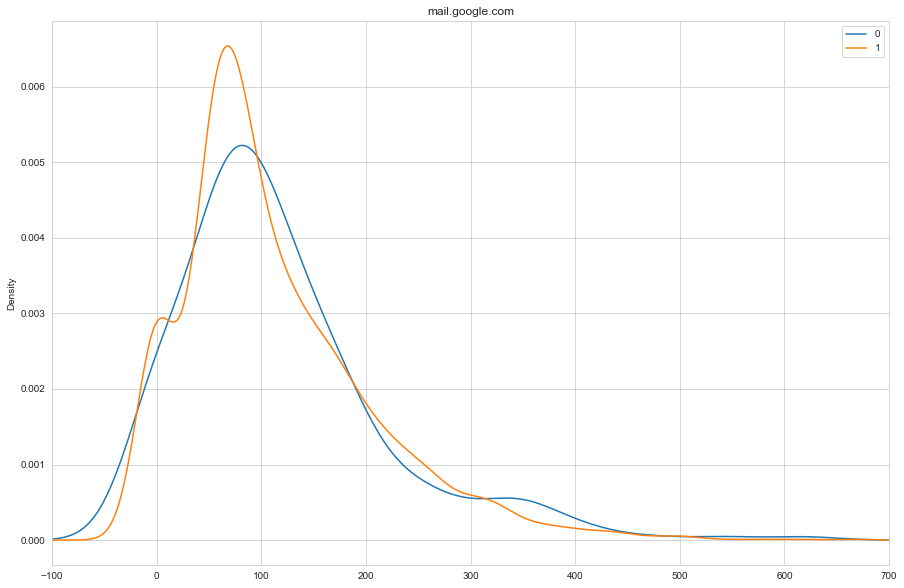

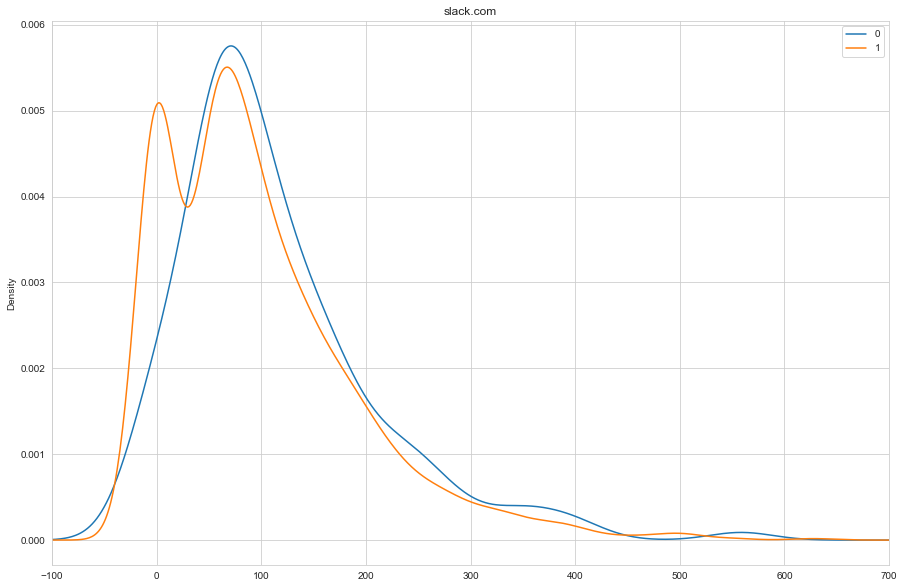

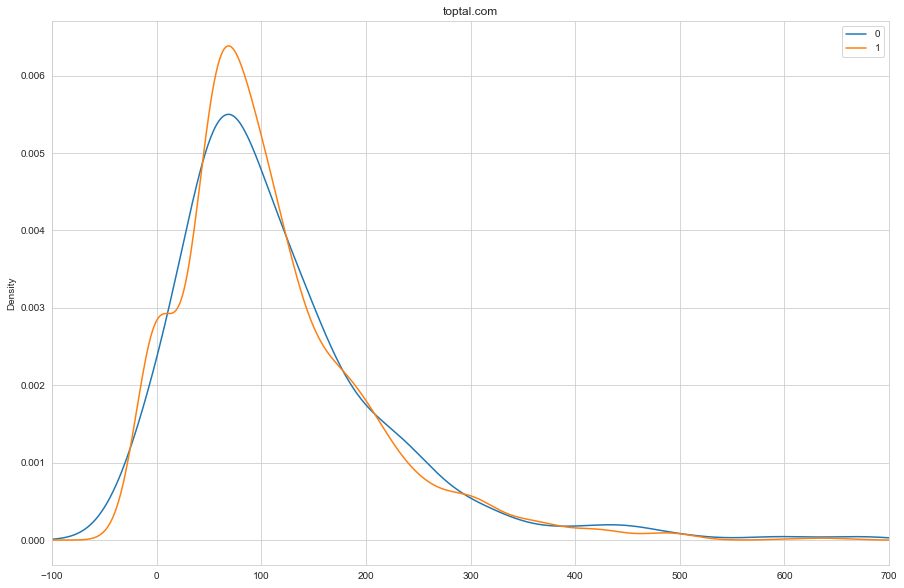

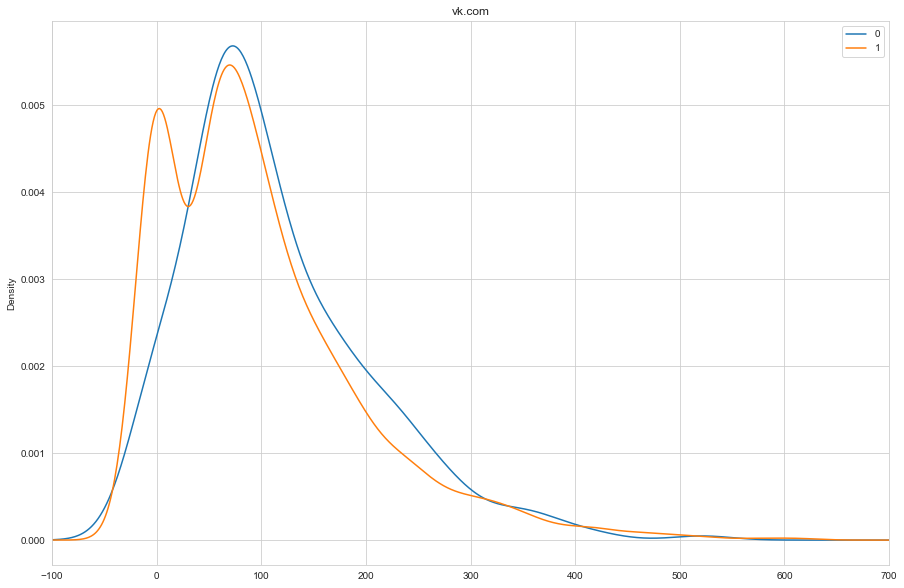

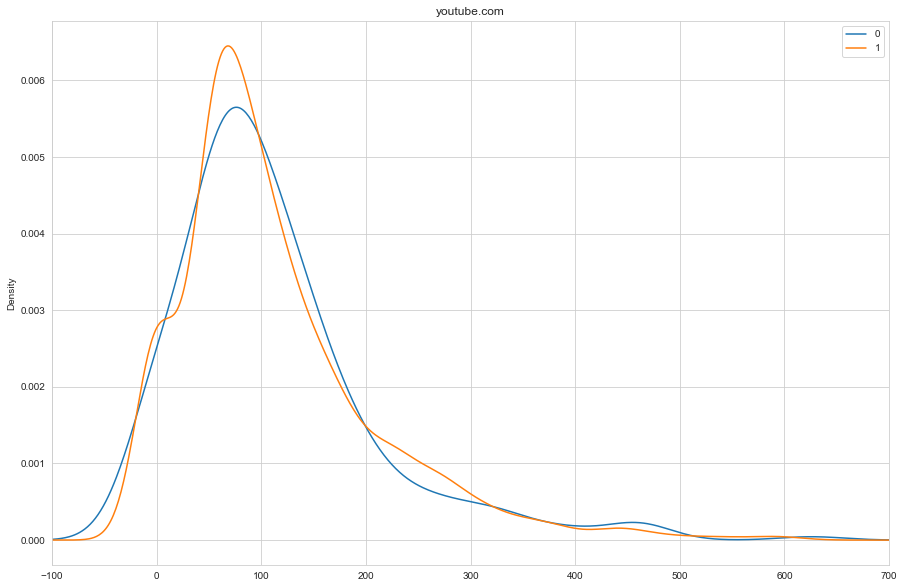

In [23]:
for site_name in site_names:
    g = df_candidates.groupby('Joe')
    g = g.filter(lambda x: x[site_name].mean() > 0)
    g.groupby("Joe")[site_name].plot.density(figsize=(15,10), legend = True, xlim = (-100,700), title = site_name)
    plt.show()

In [24]:
df_candidates.drop('sites', axis = 1)

browser          os locale  user_id gender        location  week_day  \
0      Firefox      Ubuntu  ru_RU      105      m     USA/Chicago         6   
69      Chrome      Ubuntu  ru_RU       15      m    France/Paris         4   
125     Chrome      Ubuntu  ru_RU       82      m     USA/Chicago         4   
146     Chrome  Windows 10  ru_RU        0      m     USA/Chicago         1   
147    Firefox  Windows 10  ru_RU        0      m  Canada/Toronto         5   
...        ...         ...    ...      ...    ...             ...       ...   
59934  Firefox  Windows 10  ru_RU       15      m    France/Paris         6   
59946  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago         0   
59981   Chrome  Windows 10  ru_RU      192      m    France/Paris         5   
59985   Chrome  Windows 10  ru_RU        0      m     USA/Chicago         1   
59998  Firefox  Windows 10  ru_RU       56      m    France/Paris         1   

            hour  Joe  lenta.ru  mail.google.com  slack.com  toptal.com  \
0       9.050000    1        59               50         65         132   
69     19.233333    1       279               99         62          92   
125    21.366667    1        62               59         88          96   
146    18.433333    0         0                0          0           0   
147    16.950000    0       160              140         46          49   
...          ...  ...       ...              ...        ...         ...   
59934  20.650000    1        75               65        104          87   
59946  17.766667    0        75               80        415         157   
59981   0.466667    1         0                0         45           0   
59985   2.583333    0       214              543        146          60   
59998  14.283333    1        82              127          0         103   

       vk.com  youtube.com  
0           0           67  
69         85           82  
125       191          123  
146       120           71  
147        45          208  
...       ...          ...  
59934      72           88  
59946     151           52  
59981      51           54  
59985     109           58  
59998     133          251  

[2525 rows x 15 columns]

## Order in with Joe visited sites

In [25]:

temp_lens = {key:{key:0 for key in range(13)} for key in site_names + ["other", "none"]}
for s in df_candidates[df_candidates["user_id"] == 0]["sites"]:
    for i, site in enumerate(s):
        if site["site"] in site_names:
            temp_lens[site["site"]][i] += 1
        else:
            temp_lens['other'][i] += 1
    for i in range(len(s), 13):
        temp_lens['none'][i] += 1
print(user)
display(pd.DataFrame(temp_lens))

111


lenta.ru  mail.google.com  slack.com  toptal.com  vk.com  youtube.com  \
0          8              220         13          11      33            9   
1         10               23          7          45     198           11   
2         43                7          1         186      25            4   
3        172                1         55          16       0            4   
4         12                0         76           0       1           17   
5         11                0         41           1       0           63   
6          3                0         36           1       2           43   
7          1                1         18           0       0           30   
8          1                1          6           1       0           27   
9          0                0          4           0       0           23   
10         0                0          3           1       0           18   
11         0                0          1           1       0            7   
12         0                0          0           0       0            0   

    other  none  
0       0     0  
1       0     0  
2      26     2  
3      38     8  
4     173    15  
5     147    31  
6     134    75  
7     135   109  
8     104   154  
9      76   191  
10     49   223  
11     19   266  
12      0   294

In [26]:
orders = ["order"+str(i) for i in range(12)]
site_codes = ['none'] + site_names + ['other']
def get_order(s):
    res = [0]*12
    for i, site in enumerate(s):
        if site["site"] in site_names:
            res[i] = site_codes.index(site["site"])
        else:
            res[i] = len(site_codes)-1
    return pd.Series(res, index=orders)

df_candidates[orders] = df_candidates["sites"].apply(lambda x: get_order(x))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [27]:
df_candidates

browser          os locale  user_id gender        location  \
0      Firefox      Ubuntu  ru_RU      105      m     USA/Chicago   
69      Chrome      Ubuntu  ru_RU       15      m    France/Paris   
125     Chrome      Ubuntu  ru_RU       82      m     USA/Chicago   
146     Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
147    Firefox  Windows 10  ru_RU        0      m  Canada/Toronto   
...        ...         ...    ...      ...    ...             ...   
59934  Firefox  Windows 10  ru_RU       15      m    France/Paris   
59946  Firefox      Ubuntu  ru_RU        0      m     USA/Chicago   
59981   Chrome  Windows 10  ru_RU      192      m    France/Paris   
59985   Chrome  Windows 10  ru_RU        0      m     USA/Chicago   
59998  Firefox  Windows 10  ru_RU       56      m    France/Paris   

                                                   sites  week_day       hour  \
0      [{'site': 'mail.google.com', 'length': 50}, {'...         6   9.050000   
69     [{'site': 'lenta.ru', 'length': 279}, {'site':...         4  19.233333   
125    [{'site': 'mail.google.com', 'length': 59}, {'...         4  21.366667   
146    [{'site': 'youtube.com', 'length': 71}, {'site...         1  18.433333   
147    [{'site': 'mail.google.com', 'length': 140}, {...         5  16.950000   
...                                                  ...       ...        ...   
59934  [{'site': 'lenta.ru', 'length': 75}, {'site': ...         6  20.650000   
59946  [{'site': 'mail.google.com', 'length': 80}, {'...         0  17.766667   
59981  [{'site': 'vk.com', 'length': 51}, {'site': 'y...         5   0.466667   
59985  [{'site': 'vk.com', 'length': 109}, {'site': '...         1   2.583333   
59998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...         1  14.283333   

       Joe  ...  order2  order3  order4  order5  order6  order7  order8  \
0        1  ...       3       1       6       7       0       0       0   
69       1  ...       2       5       6       7       3       7       7   
125      1  ...       1       4       7       3       7       7       6   
146      0  ...       7       7       7       7       0       0       0   
147      0  ...       4       3       1       6       0       0       0   
...    ...  ...     ...     ...     ...     ...     ...     ...     ...   
59934    1  ...       5       2       6       7       7       3       7   
59946    0  ...       4       3       1       6       0       0       0   
59981    1  ...       3       7       7       7       7       7       0   
59985    0  ...       4       1       3       7       6       0       0   
59998    1  ...       5       2       6       0       0       0       0   

       order9  order10  order11  
0           0        0        0  
69          0        0        0  
125         7        7        0  
146         0        0        0  
147         0        0        0  
...       ...      ...      ...  
59934       0        0        0  
59946       0        0        0  
59981       0        0        0  
59985       0        0        0  
59998       0        0        0  

[2525 rows x 28 columns]

Order for whole dataset

In [28]:
hist = df['sites'].apply(pd.Series)
sites = hist.apply(lambda x: x.str['site'])
sites.fillna('', inplace=True)

In [29]:
def order_sites(site):
    if site in site_names:
        return site
    elif site == "":
        return "none"
    else:
        return "other"

In [30]:
for i in sites.columns:
    df["order" + str(i)] = sites[i].apply(order_sites)

In [31]:
df

browser          os locale  user_id gender  \
0                Firefox      Ubuntu  ru_RU      105      m   
1                Firefox   Windows 8  pl-PL       11      m   
2                 Chrome      Ubuntu  zh-CN       17      m   
3                Firefox  Windows 10  en-SG       92      f   
4      Internet Explorer   Windows 8  xh-ZA      120      m   
...                  ...         ...    ...      ...    ...   
59995             Chrome   Windows 8  en-SG       60      f   
59996             Chrome  Windows 10  pt-PT      178      m   
59997             Safari       MacOS  it-IT       32      m   
59998            Firefox  Windows 10  ru_RU       56      m   
59999            Firefox  Windows 10  pt-BR      113      f   

                    location  \
0                USA/Chicago   
1                USA/Chicago   
2        Singapore/Singapore   
3                USA/Chicago   
4               France/Paris   
...                      ...   
59995            USA/Chicago   
59996   New Zealand/Auckland   
59997  Netherlands/Amsterdam   
59998           France/Paris   
59999   New Zealand/Auckland   

                                                   sites  week_day       hour  \
0      [{'site': 'mail.google.com', 'length': 50}, {'...         6   9.050000   
1      [{'site': 'meduza.org', 'length': 40}, {'site'...         2  13.950000   
2      [{'site': 'facebook.net', 'length': 74}, {'sit...         1   2.100000   
3      [{'site': 'live.com', 'length': 79}, {'site': ...         2   0.083333   
4      [{'site': 'cnn.com', 'length': 65}, {'site': '...         1  14.916667   
...                                                  ...       ...        ...   
59995  [{'site': 'toptal.com', 'length': 191}, {'site...         0  14.983333   
59996  [{'site': 'vk.com', 'length': 126}, {'site': '...         4   6.033333   
59997  [{'site': 'slack.com', 'length': 74}, {'site':...         4  10.450000   
59998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...         1  14.283333   
59999  [{'site': 'baidu.com', 'length': 60}, {'site':...         3   6.950000   

                order0  ...           order3       order4 order5 order6  \
0      mail.google.com  ...         lenta.ru  youtube.com  other   none   
1                other  ...            other        other  other  other   
2                other  ...            other        other  other  other   
3                other  ...             none         none   none   none   
4                other  ...            other        other  other  other   
...                ...  ...              ...          ...    ...    ...   
59995       toptal.com  ...            other        other  other   none   
59996           vk.com  ...            other        other   none   none   
59997        slack.com  ...            other         none   none   none   
59998         lenta.ru  ...  mail.google.com  youtube.com   none   none   
59999            other  ...            other        other  other  other   

      order7 order8 order9 order10 order11 order12  
0       none   none   none    none    none    none  
1      other  other   none    none    none    none  
2       none   none   none    none    none    none  
3       none   none   none    none    none    none  
4      other  other   none    none    none    none  
...      ...    ...    ...     ...     ...     ...  
59995   none   none   none    none    none    none  
59996   none   none   none    none    none    none  
59997   none   none   none    none    none    none  
59998   none   none   none    none    none    none  
59999  other   none   none    none    none    none  

[60000 rows x 22 columns]

# Dataset for model training

In [35]:
df1 = pd.DataFrame()
df1

df1['browser'] = df_candidates['browser'].apply(lambda x: 1 if x == 'Chrome' else 0)
df1['os'] = df_candidates['os'].apply(lambda x: 1 if x == 'Windows 10' else 0)
df1['Joe'] = df_candidates['Joe']
df1[site_names] = df_candidates[site_names]
df1['week_day'] = df_candidates['week_day']
df1['hour'] = df_candidates['hour']
orders = ["order" + str(i) for i in range(12)]
df1[orders] = df_candidates[orders]
df1.reset_index(drop = True)


browser  os  Joe  lenta.ru  mail.google.com  slack.com  toptal.com  \
0           0   0    1        59               50         65         132   
1           1   0    1       279               99         62          92   
2           1   0    1        62               59         88          96   
3           1   1    0         0                0          0           0   
4           0   1    0       160              140         46          49   
...       ...  ..  ...       ...              ...        ...         ...   
2520        0   1    1        75               65        104          87   
2521        0   0    0        75               80        415         157   
2522        1   1    1         0                0         45           0   
2523        1   1    0       214              543        146          60   
2524        0   1    1        82              127          0         103   

      vk.com  youtube.com  week_day  ...  order2  order3  order4  order5  \
0          0           67         6  ...       3       1       6       7   
1         85           82         4  ...       2       5       6       7   
2        191          123         4  ...       1       4       7       3   
3        120           71         1  ...       7       7       7       7   
4         45          208         5  ...       4       3       1       6   
...      ...          ...       ...  ...     ...     ...     ...     ...   
2520      72           88         6  ...       5       2       6       7   
2521     151           52         0  ...       4       3       1       6   
2522      51           54         5  ...       3       7       7       7   
2523     109           58         1  ...       4       1       3       7   
2524     133          251         1  ...       5       2       6       0   

      order6  order7  order8  order9  order10  order11  
0          0       0       0       0        0        0  
1          3       7       7       0        0        0  
2          7       7       6       7        7        0  
3          0       0       0       0        0        0  
4          0       0       0       0        0        0  
...      ...     ...     ...     ...      ...      ...  
2520       7       3       7       0        0        0  
2521       0       0       0       0        0        0  
2522       7       7       0       0        0        0  
2523       6       0       0       0        0        0  
2524       0       0       0       0        0        0  

[2525 rows x 23 columns]

In [36]:
y = df1['Joe'].reset_index(drop = True)
X = df1.drop('Joe', axis = 1)
print(X)

       browser  os  lenta.ru  mail.google.com  slack.com  toptal.com  vk.com  \
0            0   0        59               50         65         132       0   
69           1   0       279               99         62          92      85   
125          1   0        62               59         88          96     191   
146          1   1         0                0          0           0     120   
147          0   1       160              140         46          49      45   
...        ...  ..       ...              ...        ...         ...     ...   
59934        0   1        75               65        104          87      72   
59946        0   0        75               80        415         157     151   
59981        1   1         0                0         45           0      51   
59985        1   1       214              543        146          60     109   
59998        0   1        82              127          0         103     133   

       youtube.com  week_day       hour

# Test model - for dataset with candidates only

Importing packages

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, classification_report

Split dataset to train and validation sets

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

In [39]:
y_train.value_counts()

1    1548
0     219
Name: Joe, dtype: int64

In [40]:
y_test.value_counts()

1    683
0     75
Name: Joe, dtype: int64

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 42)

grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = {'criterion' : ['gini','entropy'],
                'max_depth' : range(5,12),
                'min_samples_leaf' : [2, 5, 10, 20, 50],
                'min_samples_split' : [2, 5, 10, 20, 50]},
    scoring = {'precision' : make_scorer(precision_score), 'recall_score' : make_scorer(recall_score)},
    refit = 'precision',
    cv = 4,
    n_jobs = -1
)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

In [42]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.007970      0.000451         0.005336        0.000704   
1         0.008456      0.000453         0.005662        0.000863   
2         0.009818      0.002020         0.007276        0.001853   
3         0.011000      0.001203         0.006591        0.000471   
4         0.011822      0.002685         0.006391        0.000345   
..             ...           ...              ...             ...   
345       0.009156      0.001943         0.010342        0.005499   
346       0.010361      0.002914         0.009299        0.002421   
347       0.008679      0.000077         0.005969        0.000655   
348       0.009502      0.001412         0.007403        0.001189   
349       0.008028      0.000382         0.004715        0.000548   

    param_criterion param_max_depth param_min_samples_leaf  \
0              gini               5                      2   
1              gini               5                      2   
2              gini               5                      2   
3              gini               5                      2   
4              gini               5                      2   
..              ...             ...                    ...   
345         entropy              11                     50   
346         entropy              11                     50   
347         entropy              11                     50   
348         entropy              11                     50   
349         entropy              11                     50   

    param_min_samples_split  \
0                         2   
1                         5   
2                        10   
3                        20   
4                        50   
..                      ...   
345                       2   
346                       5   
347                      10   
348                      20   
349                      50   

                                                params  split0_test_precision  \
0    {'criterion': 'gini', 'max_depth': 5, 'min_sam...               0.904077   
1    {'criterion': 'gini', 'max_depth': 5, 'min_sam...               0.905797   
2    {'criterion': 'gini', 'max_depth': 5, 'min_sam...               0.905569   
3    {'criterion': 'gini', 'max_depth': 5, 'min_sam...               0.904535   
4    {'criterion': 'gini', 'max_depth': 5, 'min_sam...               0.906475   
..                                                 ...                    ...   
345  {'criterion': 'entropy', 'max_depth': 11, 'min...               0.902676   
346  {'criterion': 'entropy', 'max_depth': 11, 'min...               0.902676   
347  {'criterion': 'entropy', 'max_depth': 11, 'min...               0.902676   
348  {'criterion': 'entropy', 'max_depth': 11, 'min...               0.902676   
349  {'criterion': 'entropy', 'max_depth': 11, 'min...               0.902676   

     ...  mean_test_precision  std_test_precision  rank_test_precision  \
0    ...             0.911685            0.007793                  251   
1    ...             0.913651            0.006651                  236   
2    ...             0.911589            0.006701                  282   
3    ...             0.913489            0.007088                  238   
4    ...             0.910357            0.007367                  288   
..   ...                  ...                 ...                  ...   
345  ...             0.911640            0.008636                  252   
346  ...             0.911640            0.008636                  252   
347  ...             0.911640            0.008636                  252   
348  ...             0.911640            0.008636                  252   
349  ...             0.911640            0.008636                  252   

     split0_test_recall_score  split1_test_recall_score  \
0                    0.974160                  0.971576   
1                    0.968992                  0.971576   
2                  

In [43]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9352242583621961


In [44]:
print(roc_auc_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.7471351878965349
0.9360119047619048


# Model for whole dataset

In [45]:
df

browser          os locale  user_id gender  \
0                Firefox      Ubuntu  ru_RU      105      m   
1                Firefox   Windows 8  pl-PL       11      m   
2                 Chrome      Ubuntu  zh-CN       17      m   
3                Firefox  Windows 10  en-SG       92      f   
4      Internet Explorer   Windows 8  xh-ZA      120      m   
...                  ...         ...    ...      ...    ...   
59995             Chrome   Windows 8  en-SG       60      f   
59996             Chrome  Windows 10  pt-PT      178      m   
59997             Safari       MacOS  it-IT       32      m   
59998            Firefox  Windows 10  ru_RU       56      m   
59999            Firefox  Windows 10  pt-BR      113      f   

                    location  \
0                USA/Chicago   
1                USA/Chicago   
2        Singapore/Singapore   
3                USA/Chicago   
4               France/Paris   
...                      ...   
59995            USA/Chicago   
59996   New Zealand/Auckland   
59997  Netherlands/Amsterdam   
59998           France/Paris   
59999   New Zealand/Auckland   

                                                   sites  week_day       hour  \
0      [{'site': 'mail.google.com', 'length': 50}, {'...         6   9.050000   
1      [{'site': 'meduza.org', 'length': 40}, {'site'...         2  13.950000   
2      [{'site': 'facebook.net', 'length': 74}, {'sit...         1   2.100000   
3      [{'site': 'live.com', 'length': 79}, {'site': ...         2   0.083333   
4      [{'site': 'cnn.com', 'length': 65}, {'site': '...         1  14.916667   
...                                                  ...       ...        ...   
59995  [{'site': 'toptal.com', 'length': 191}, {'site...         0  14.983333   
59996  [{'site': 'vk.com', 'length': 126}, {'site': '...         4   6.033333   
59997  [{'site': 'slack.com', 'length': 74}, {'site':...         4  10.450000   
59998  [{'site': 'lenta.ru', 'length': 82}, {'site': ...         1  14.283333   
59999  [{'site': 'baidu.com', 'length': 60}, {'site':...         3   6.950000   

                order0  ...           order3       order4 order5 order6  \
0      mail.google.com  ...         lenta.ru  youtube.com  other   none   
1                other  ...            other        other  other  other   
2                other  ...            other        other  other  other   
3                other  ...             none         none   none   none   
4                other  ...            other        other  other  other   
...                ...  ...              ...          ...    ...    ...   
59995       toptal.com  ...            other        other  other   none   
59996           vk.com  ...            other        other   none   none   
59997        slack.com  ...            other         none   none   none   
59998         lenta.ru  ...  mail.google.com  youtube.com   none   none   
59999            other  ...            other        other  other  other   

      order7 order8 order9 order10 order11 order12  
0       none   none   none    none    none    none  
1      other  other   none    none    none    none  
2       none   none   none    none    none    none  
3       none   none   none    none    none    none  
4      other  other   none    none    none    none  
...      ...    ...    ...     ...     ...     ...  
59995   none   none   none    none    none    none  
59996   none   none   none    none    none    none  
59997   none   none   none    none    none    none  
59998   none   none   none    none    none    none  
59999  other   none   none    none    none    none  

[60000 rows x 22 columns]

In [46]:
site_names = ['lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com', 'vk.com', 'youtube.com']

def get_sites(s):
    list =[0] * len(site_names)
    for site in s:
        if site['site'] in site_names:
            idx = site_names.index(site['site'])
            list[idx] += site['length']
    return pd.Series(list, index=site_names)

df[site_names] = df['sites'].apply(lambda x: get_sites(x))

In [47]:
df.columns

Index(['browser', 'os', 'locale', 'user_id', 'gender', 'location', 'sites',
       'week_day', 'hour', 'order0', 'order1', 'order2', 'order3', 'order4',
       'order5', 'order6', 'order7', 'order8', 'order9', 'order10', 'order11',
       'order12', 'lenta.ru', 'mail.google.com', 'slack.com', 'toptal.com',
       'vk.com', 'youtube.com'],
      dtype='object')

In [48]:
df['Joe'] = df['user_id'].apply(lambda x: 0 if x == 0 else 1)
df = df.drop('user_id', axis = 1)

In [49]:
df = df.drop('sites',axis = 1)

In [50]:
y = df['Joe'].reset_index(drop = True)
X = df.drop('Joe', axis = 1)

In [51]:
X

browser          os locale gender               location  \
0                Firefox      Ubuntu  ru_RU      m            USA/Chicago   
1                Firefox   Windows 8  pl-PL      m            USA/Chicago   
2                 Chrome      Ubuntu  zh-CN      m    Singapore/Singapore   
3                Firefox  Windows 10  en-SG      f            USA/Chicago   
4      Internet Explorer   Windows 8  xh-ZA      m           France/Paris   
...                  ...         ...    ...    ...                    ...   
59995             Chrome   Windows 8  en-SG      f            USA/Chicago   
59996             Chrome  Windows 10  pt-PT      m   New Zealand/Auckland   
59997             Safari       MacOS  it-IT      m  Netherlands/Amsterdam   
59998            Firefox  Windows 10  ru_RU      m           France/Paris   
59999            Firefox  Windows 10  pt-BR      f   New Zealand/Auckland   

       week_day       hour           order0       order1       order2  ...  \
0             6   9.050000  mail.google.com   toptal.com    slack.com  ...   
1             2  13.950000            other        other  youtube.com  ...   
2             1   2.100000            other        other  youtube.com  ...   
3             2   0.083333            other        other         none  ...   
4             1  14.916667            other        other        other  ...   
...         ...        ...              ...          ...          ...  ...   
59995         0  14.983333       toptal.com    slack.com       vk.com  ...   
59996         4   6.033333           vk.com    slack.com  youtube.com  ...   
59997         4  10.450000        slack.com  youtube.com       vk.com  ...   
59998         1  14.283333         lenta.ru   toptal.com       vk.com  ...   
59999         3   6.950000            other        other        other  ...   

      order9 order10 order11 order12 lenta.ru mail.google.com slack.com  \
0       none    none    none    none       59              50        65   
1       none    none    none    none        0               0         0   
2       none    none    none    none        0               0         0   
3       none    none    none    none        0               0         0   
4       none    none    none    none        0               0         0   
...      ...     ...     ...     ...      ...             ...       ...   
59995   none    none    none    none        0               0       136   
59996   none    none    none    none        0               0        63   
59997   none    none    none    none        0               0        74   
59998   none    none    none    none       82             127         0   
59999   none    none    none    none        0               0         0   

      toptal.com vk.com youtube.com  
0            132      0          67  
1              0      0         202  
2              0      0         109  
3              0      0           0  
4              0      0           0  
...          ...    ...         ...  
59995        191    188           0  
59996          0    126          46  
59997          0     70          43  
59998        103    133         251  
59999          0      0           0  

[60000 rows x 26 columns]

Encoder for string columns

In [52]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X_cat = X.select_dtypes(include = 'object').columns
X[X_cat] = enc.fit_transform(X[X_cat])


In [53]:
X

browser   os  locale  gender  location  week_day       hour  order0  \
0          1.0  2.0    18.0     1.0      17.0         6   9.050000     1.0   
1          1.0  5.0    13.0     1.0      17.0         2  13.950000     3.0   
2          0.0  2.0    24.0     1.0      14.0         1   2.100000     3.0   
3          1.0  3.0     6.0     0.0      17.0         2   0.083333     3.0   
4          2.0  5.0    23.0     1.0       5.0         1  14.916667     3.0   
...        ...  ...     ...     ...       ...       ...        ...     ...   
59995      0.0  5.0     6.0     0.0      17.0         0  14.983333     5.0   
59996      0.0  3.0    15.0     1.0      12.0         4   6.033333     6.0   
59997      3.0  1.0    10.0     1.0      11.0         4  10.450000     4.0   
59998      1.0  3.0    18.0     1.0       5.0         1  14.283333     0.0   
59999      1.0  3.0    14.0     0.0      12.0         3   6.950000     3.0   

       order1  order2  ...  order9  order10  order11  order12  lenta.ru  \
0         5.0     4.0  ...     2.0      2.0      2.0      1.0        59   
1         3.0     7.0  ...     2.0      2.0      2.0      1.0         0   
2         3.0     7.0  ...     2.0      2.0      2.0      1.0         0   
3         3.0     2.0  ...     2.0      2.0      2.0      1.0         0   
4         3.0     3.0  ...     2.0      2.0      2.0      1.0         0   
...       ...     ...  ...     ...      ...      ...      ...       ...   
59995     4.0     6.0  ...     2.0      2.0      2.0      1.0         0   
59996     4.0     7.0  ...     2.0      2.0      2.0      1.0         0   
59997     7.0     6.0  ...     2.0      2.0      2.0      1.0         0   
59998     5.0     6.0  ...     2.0      2.0      2.0      1.0        82   
59999     3.0     3.0  ...     2.0      2.0      2.0      1.0         0   

       mail.google.com  slack.com  toptal.com  vk.com  youtube.com  
0                   50         65         132       0           67  
1                    0          0           0       0          202  
2                    0          0           0       0          109  
3                    0          0           0       0            0  
4                    0          0           0       0            0  
...                ...        ...         ...     ...          ...  
59995                0        136         191     188            0  
59996                0         63           0     126           46  
59997                0         74           0      70           43  
59998              127          0         103     133          251  
59999                0          0           0       0            0  

[60000 rows x 26 columns]

1    59706
0      294
Name: Joe, dtype: int64


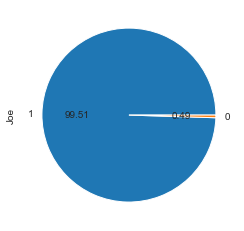

In [54]:
y.value_counts().plot.pie(autopct ='%.2f')
print(y.value_counts())
plt.show()

Balancing dataset

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)

1    47766
0    47766
Name: Joe, dtype: int64


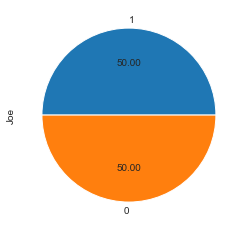

In [58]:
y_train_resampled.value_counts().plot.pie(autopct= '%.2f')
print(y_train_resampled.value_counts())
plt.show()

In [59]:
grid = GridSearchCV(
    estimator = DecisionTreeClassifier(),
    param_grid = {'criterion' : ['gini','entropy'],
                'max_depth' : range(5,12),
                'min_samples_leaf' : [2, 5, 10, 20, 50],
                'min_samples_split' : [2, 5, 10, 20, 50]},
    scoring = {'precision' : make_scorer(precision_score), 'recall_score' : make_scorer(recall_score)},
    refit = 'precision',
    cv = 4,
    n_jobs = -1
)

grid.fit(X_train_resampled, y_train_resampled)
y_pred = grid.predict(X_test)

In [76]:
print("Best DecisionTreeClassifier params: %s" % grid.best_params_)
print("Score for best model: %s" % grid.best_score_)

Best DecisionTreeClassifier params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Score for best model: 0.9993837337081244


In [61]:
print(y_train_resampled.value_counts())
print(y_test.value_counts())


1    47766
0    47766
Name: Joe, dtype: int64
1    11940
0       60
Name: Joe, dtype: int64


In [74]:
print("Roc auc score: %s" % roc_auc_score(y_test, y_pred))
print("F1 score: %s" % f1_score(y_test, y_pred))

Roc auc score: 0.9237018425460637
F1 score: 0.98993997802012
